# KNN for Iris flowers classification

In [16]:
# import modules
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split

In [17]:
# load iris dataset
iris = ds.load_iris()

In [22]:
# assign iris features to X, an array of shape (150,4)
# assign iris labels to y, an array of shape (150,)
X = iris['data']
y = iris['target']

## (a) calculate elements in each class

In [23]:
# calculate elements in each class
# print out the result
## to do 

#get all the classes
classes = dict()
label = iris.target_names
for i in y:
    label_name = label[i]
    if label_name not in classes:
        classes[label_name] = 1
    else:
        classes[label_name] += 1

for i in classes:
    print(i,': ',classes[i])

   

setosa :  50
versicolor :  50
virginica :  50


**Answer**: For every class, there are 50 observations in each class.

## (b) build a KNeighborsClassifier with k=1

In [24]:
# initialize the knn model
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [25]:
# calculate prediction accuracy
# print out the accuracy
## to do

accuracy = model_knn.score(X,y)
print(accuracy)

1.0


**Accuracy**: 1.0. 
Yes, this is meaningful, it represents the number of correct prediction our model are able to make after being trained.

## (c) find optimal value of k

In [26]:
# split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=0)

In [27]:
# try different value of k from 1 to 50
K = 50
train_accu = np.zeros(50)
test_accu = np.zeros(50)
for i in range(1,K+1):
    # initialize the model
    # fit the data
    # store training accuracy in train_accu
    # store validation accuracy in test_acc
    ## to do
    new_model = KNeighborsClassifier(n_neighbors=i)
    new_model.fit(X_train,y_train)
    train_accu_val = new_model.score(X_train,y_train)
    test_accu_val = new_model.score(X_test,y_test)
#     print(train_accu_val,test_accu_val)
    train_accu[i-1] = train_accu_val
    test_accu[i-1] = test_accu_val

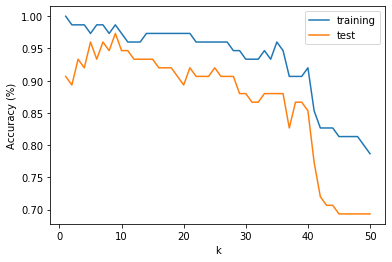

In [29]:
# plot the training accuracy and test accuracy against k
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
x_range = np.linspace(1, K, num=K)
plt.plot(x_range, train_accu, label='training')
plt.plot(x_range, test_accu, label='test')
plt.legend()

In [30]:
# find the optimal k value
# print out the optimal k
## to do

##I find the k with the least error rate with test dataset
max = 0
max_k = None
for i in range(K):
    if test_accu[i] > max:
        max = test_accu[i]
        max_k = i+1

print("min error rate found at k =%d"%max_k)
print("\nthe error rate is %f"%(1-max))

min error rate found at k =9

the error rate is 0.026667


**Answer**: The minimal error rate was found at k=9.
The error rate is 1-(0.97333..) = 0.02666...

## (d) predict a new sample

In [31]:
# check the order of the features
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [32]:
# match the input values with the feature names
## to do
new_data = np.array([[3.8,5.0,1.2,4.1]])


In [33]:
# make prediction
# print out the prediction result
## to do
## I would use k=9, based on previous question
new_model = KNeighborsClassifier(n_neighbors=9)
new_model.fit(X_train,y_train)
output_class = new_model.predict(new_data)
class_label = output_class[0]
class_names = iris['target_names']
print("prediction: ",class_names[class_label])

prediction:  setosa


**Answer**: The prediction is class `setosa`